In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree


In [2]:
# import data
df = pd.read_csv('NFLClean.csv')
# print(df.columns)
# df.head()

df.personnelD = df.personnelD.astype('category')
df.personnelO = df.personnelO.astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19210 entries, 0 to 19209
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   defense_gain         19210 non-null  int64   
 1   offense_gain         19210 non-null  int64   
 2   defensive_team       19210 non-null  object  
 3   playResult           19210 non-null  int64   
 4   O_DB                 19210 non-null  int64   
 5   O_K                  19210 non-null  int64   
 6   O_DL                 19210 non-null  int64   
 7   O_LS                 19210 non-null  int64   
 8   O_LB                 19210 non-null  int64   
 9   O_P                  19210 non-null  int64   
 10  O_WR                 19210 non-null  int64   
 11  O_TE                 19210 non-null  int64   
 12  O_RB                 19210 non-null  int64   
 13  O_QB                 19210 non-null  int64   
 14  O_OL                 19210 non-null  int64   
 15  D_DL               

In [3]:
# create binary variable for success of play

df['def_play_success'] = (df["playResult"] <= 0)

# testing individual personnel



In [4]:
random.seed(10)

# split data 
target = df['def_play_success'] # y
df1 = df.copy()
df1 = df[["D_DL","D_LB","D_DB","D_RB","D_WR","D_TE","D_QB","D_OL"]] # x

# Defining the attributes
X = df1
y = target

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (15368, 8)
Testing split input-  (3842, 8)


In [5]:
# Defining the decision tree 
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [6]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

       False       0.59      0.97      0.73      2231
        True       0.55      0.05      0.09      1611

    accuracy                           0.58      3842
   macro avg       0.57      0.51      0.41      3842
weighted avg       0.57      0.58      0.46      3842



Text(0.5, 1.0, 'Accuracy Score: 0.5843310775637689')

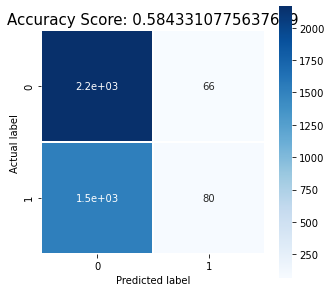

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

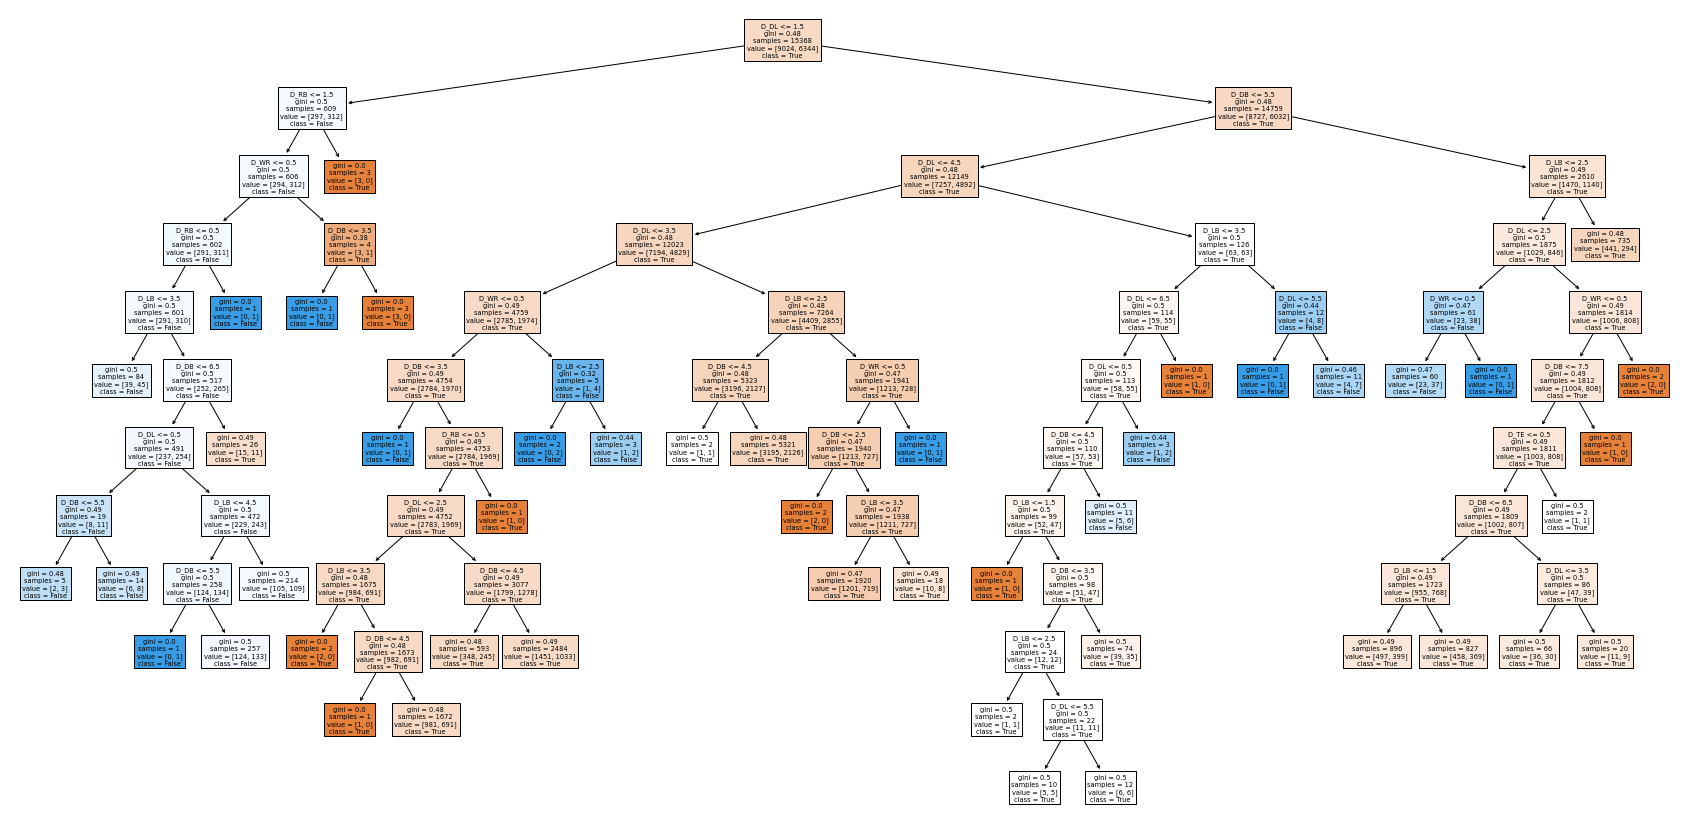

In [8]:
random.seed(10)

# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize=(30,15))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["True","False"] , filled = True , precision = 2, rounded = False)

# save tree for better quality
plt.savefig('nflTree.png')  

In [9]:
#Recursive Feature Elimination
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df1
Y = target
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


C:\Users\CSFic\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\CSFic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CSFic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False  True False  True False  True]
Feature Ranking: [ 5 15  6 12  3  9 10  8  7 13 16 14 17 11  1  2  1  4  1]


In [13]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.01565177 0.00187095 0.02944191 0.00464871 0.00496469 0.00633095
 0.11159938 0.11036479 0.08664569 0.01815788 0.034485   0.22133979
 0.14557927 0.18142151 0.00218955 0.01527631 0.00391464 0.00074012
 0.00537709]


In [14]:
# random forest
#https://veeraldoesdata.com/nfl-random-forest

from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=500,criterion='entropy',n_jobs=-1,max_depth=16)
m.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=500,
                       n_jobs=-1)

In [15]:
pred = m.predict(X_test)
print("Classification report - \n", classification_report(y_test,pred))

Classification report - 
               precision    recall  f1-score   support

       False       0.58      0.96      0.73      2231
        True       0.50      0.06      0.10      1611

    accuracy                           0.58      3842
   macro avg       0.54      0.51      0.42      3842
weighted avg       0.55      0.58      0.47      3842

